# Exponential Decay
$$w(E)=\exp \left(-\frac{E}{\lambda}\right) $$
where λ controls the decay rate. A reasonable choice is λ=5 eV, which ensures weights decrease smoothly from 0–20 eV.

In [6]:
import torch
import matplotlib.pyplot as plt
device = "cuda:0" if torch.cuda.is_available() else "cpu"

energy_grid = torch.linspace(0, 20, steps=201).to(device)  # (201,)
lambda_decay = 2.5  # Decay rate in eV
weighting = torch.exp(-energy_grid / lambda_decay)  # Smoothly decays with energy




# Inverse Decay
$$w(E)=\frac{1}{1+\frac{E}{\lambda}}$$
This function ensures that low-energy points are weighted more, but it doesn’t go to zero at high energy.

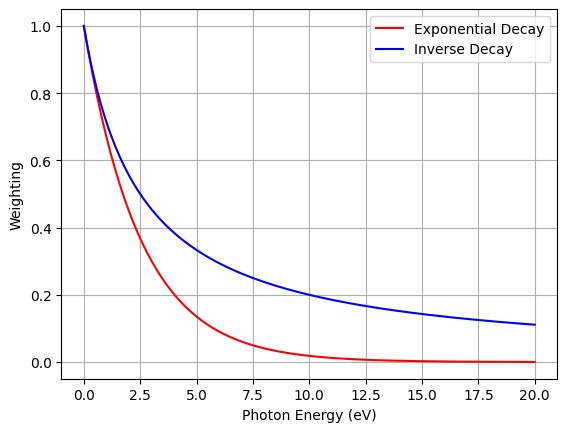

In [7]:
lambda_decay = 2.5
inv_deacy_weighting = 1 / (1 + energy_grid / lambda_decay)
plt.plot(energy_grid.cpu().numpy(), weighting.cpu().numpy(),color="red",label="Exponential Decay")
plt.plot(energy_grid.cpu().numpy(), inv_deacy_weighting.cpu().numpy(),color='blue',label="Inverse Decay")

plt.xlabel(r"Photon Energy (eV)")
plt.ylabel(r"Weighting")
plt.legend()
plt.grid()
plt.show()

# Log linspace visualization 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


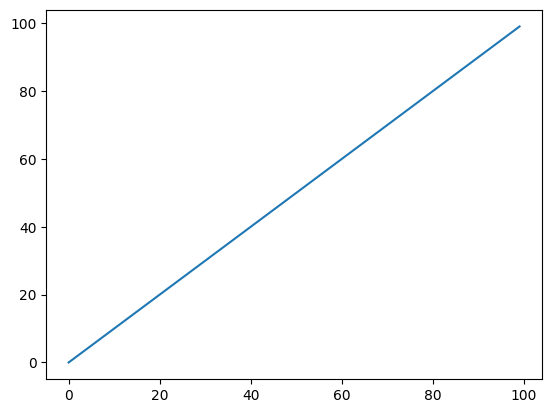

In [16]:
import math 
def loglinspace(rate, step, end=None):
    t = 0
    while end is None or t <= end:
        yield t
        t = int(t + 1 + step*(1 - math.exp(-t*rate/step)))

checkpoint_generator = loglinspace(0, 5)

chkpts_list = []
for i in range(100):
    checkpoint = next(checkpoint_generator)
    chkpts_list.append(checkpoint)
    print(checkpoint)

plt.plot(chkpts_list)
plt.show()


# Gaussian visualization 

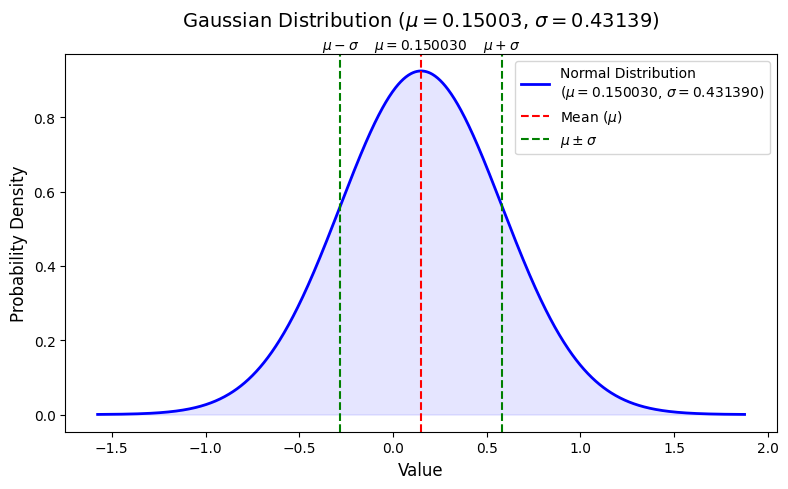

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_gaussian_distribution(mu, sigma, title="Gaussian Distribution", save_path=None):
    """
    Plots a Gaussian (normal) distribution with specified mean and standard deviation, styled like the provided plot.

    Parameters:
    - mu: Mean of the Gaussian distribution.
    - sigma: Standard deviation of the Gaussian distribution.
    - title: Title of the plot (default: "Gaussian Distribution").
    - save_path: File path to save the plot (optional, default: None).
    """
    # Generate x values for the plot (covering ±4 standard deviations from the mean)
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    
    # Compute the Gaussian PDF (probability density function)
    y = norm.pdf(x, mu, sigma)
    
    # Create the plot
    plt.figure(figsize=(8, 5), dpi=100)
    plt.plot(x, y, label=f'Normal Distribution\n($\mu={mu:.6f}$, $\sigma={sigma:.6f}$)', color='blue', linewidth=2)
    
    # Fill the area under the curve for visual effect
    plt.fill_between(x, y, alpha=0.1, color='blue')
    
    # Add vertical lines for the mean and ±1 standard deviation
    plt.axvline(mu, color='red', linestyle='--', label='Mean ($\mu$)', linewidth=1.5)
    plt.axvline(mu + sigma, color='green', linestyle='--', label='$\mu \pm \sigma$', linewidth=1.5)
    plt.axvline(mu - sigma, color='green', linestyle='--', linewidth=1.5)
    
    # Add annotations for the mean and standard deviations
    plt.text(mu, max(y)*1.05, f'$\mu={mu:.6f}$', color='black', ha='center', va='bottom', fontsize=10)
    plt.text(mu + sigma, max(y)*1.05, f'$\mu+\sigma$', color='black', ha='center', va='bottom', fontsize=10)
    plt.text(mu - sigma, max(y)*1.05, f'$\mu-\sigma$', color='black', ha='center', va='bottom', fontsize=10)
    
    # Add text for mu + sigma and mu - sigma on the curve
    # idx_mu_sigma = np.argmin(np.abs(x - (mu + sigma)))
    # idx_mu_minus_sigma = np.argmin(np.abs(x - (mu - sigma)))
    # plt.text(mu + sigma, y[idx_mu_sigma], f'$\mu+\sigma$', color='black', ha='right', va='center', fontsize=10)
    # plt.text(mu - sigma, y[idx_mu_minus_sigma], f'$\mu-\sigma$', color='black', ha='left', va='center', fontsize=10)
    
    # Customize the plot
    plt.title(f'{title}', fontsize=14, pad=20)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(False)  # No grid in the provided plot
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the plot if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Example usage
mu = 0.15003      # Mean
sigma = 0.43139   # Standard deviation
plot_gaussian_distribution(mu, sigma, title=f"Gaussian Distribution ($\mu={mu}$, $\sigma={sigma}$)", save_path="gaussian_distribution.png")